<a href="https://colab.research.google.com/github/krithi65/TASK-7/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S.KRITHIKA ----
KNN ASSIGNMENT

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Importing the dataset**

In [66]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [67]:
df= df.drop('User ID', axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [68]:
df.shape

(400, 4)

In [83]:
#generate binary values using Sklearn
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
One_enc = OneHotEncoder(handle_unknown='ignore')
#Passing gender variable
enc_df = pd.DataFrame(One_enc.fit_transform(df[['Gender']]).toarray())
# merge with passenger dataset on key values
Enc_ds= df.join(enc_df)
Enc_ds

,User ID,Gender,Age,EstimatedSalary,Purchased,0,1
0,15624510,Male,19,19000,0,0.0,1.0
1,15810944,Male,35,20000,0,0.0,1.0
2,15668575,Female,26,43000,0,1.0,0.0
3,15603246,Female,27,57000,0,1.0,0.0
4,15804002,Male,19,76000,0,0.0,1.0
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1.0,0.0
396,15706071,Male,51,23000,1,0.0,1.0
397,15654296,Female,50,20000,1,1.0,0.0
398,15755018,Male,36,33000,0,0.0,1.0


**Splitting the dataset into the Training set and Test set**

In [69]:
from sklearn.model_selection import train_test_split
X=df[['Age','EstimatedSalary']]
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

**Feature Scaling**

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting the Test set results**

In [89]:
y_pred=knn_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1])

**Making the Confusion Matrix**

In [92]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[92,  9],
       [ 7, 52]])

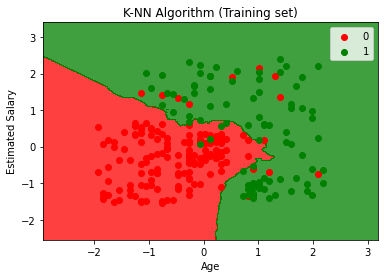

In [96]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
import matplotlib.pyplot as mtp 
import numpy as nm   
x_set, y_set = X_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, knn_model.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

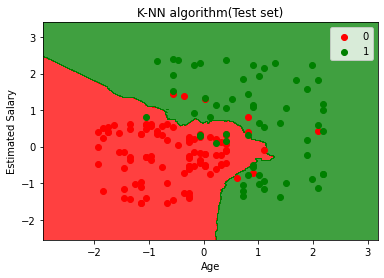

In [97]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, knn_model.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print('\n')
from sklearn.metrics import accuracy_score
print('Accuracy Of Our Model -',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       101
           1       0.85      0.88      0.87        59

    accuracy                           0.90       160
   macro avg       0.89      0.90      0.89       160
weighted avg       0.90      0.90      0.90       160



Accuracy Of Our Model - 0.9


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data1 = pd.read_csv('/content/Social_Network_Ads.csv')


In [112]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])) #predicting using the model

K value  :  1  score :  0.8551770431280417
K value  :  2  score :  0.9045980869273368
K value  :  3  score :  0.9160093975499245
K value  :  4  score :  0.9201208256418862
K value  :  5  score :  0.9272528947810035
K value  :  6  score :  0.923980533646585
K value  :  7  score :  0.9270850813894949
K value  :  8  score :  0.9340493371371035
K value  :  9  score :  0.9421882866252729
K value  :  10  score :  0.9541869441181408
K value  :  20  score :  0.9549421043799295
K value  :  50  score :  0.9612351065615037
